In [64]:
from sklearn import datasets
iris = datasets.load_iris()


In [65]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [67]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['iris_type'] = iris.target

In [68]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
iris_df.shape

(150, 5)

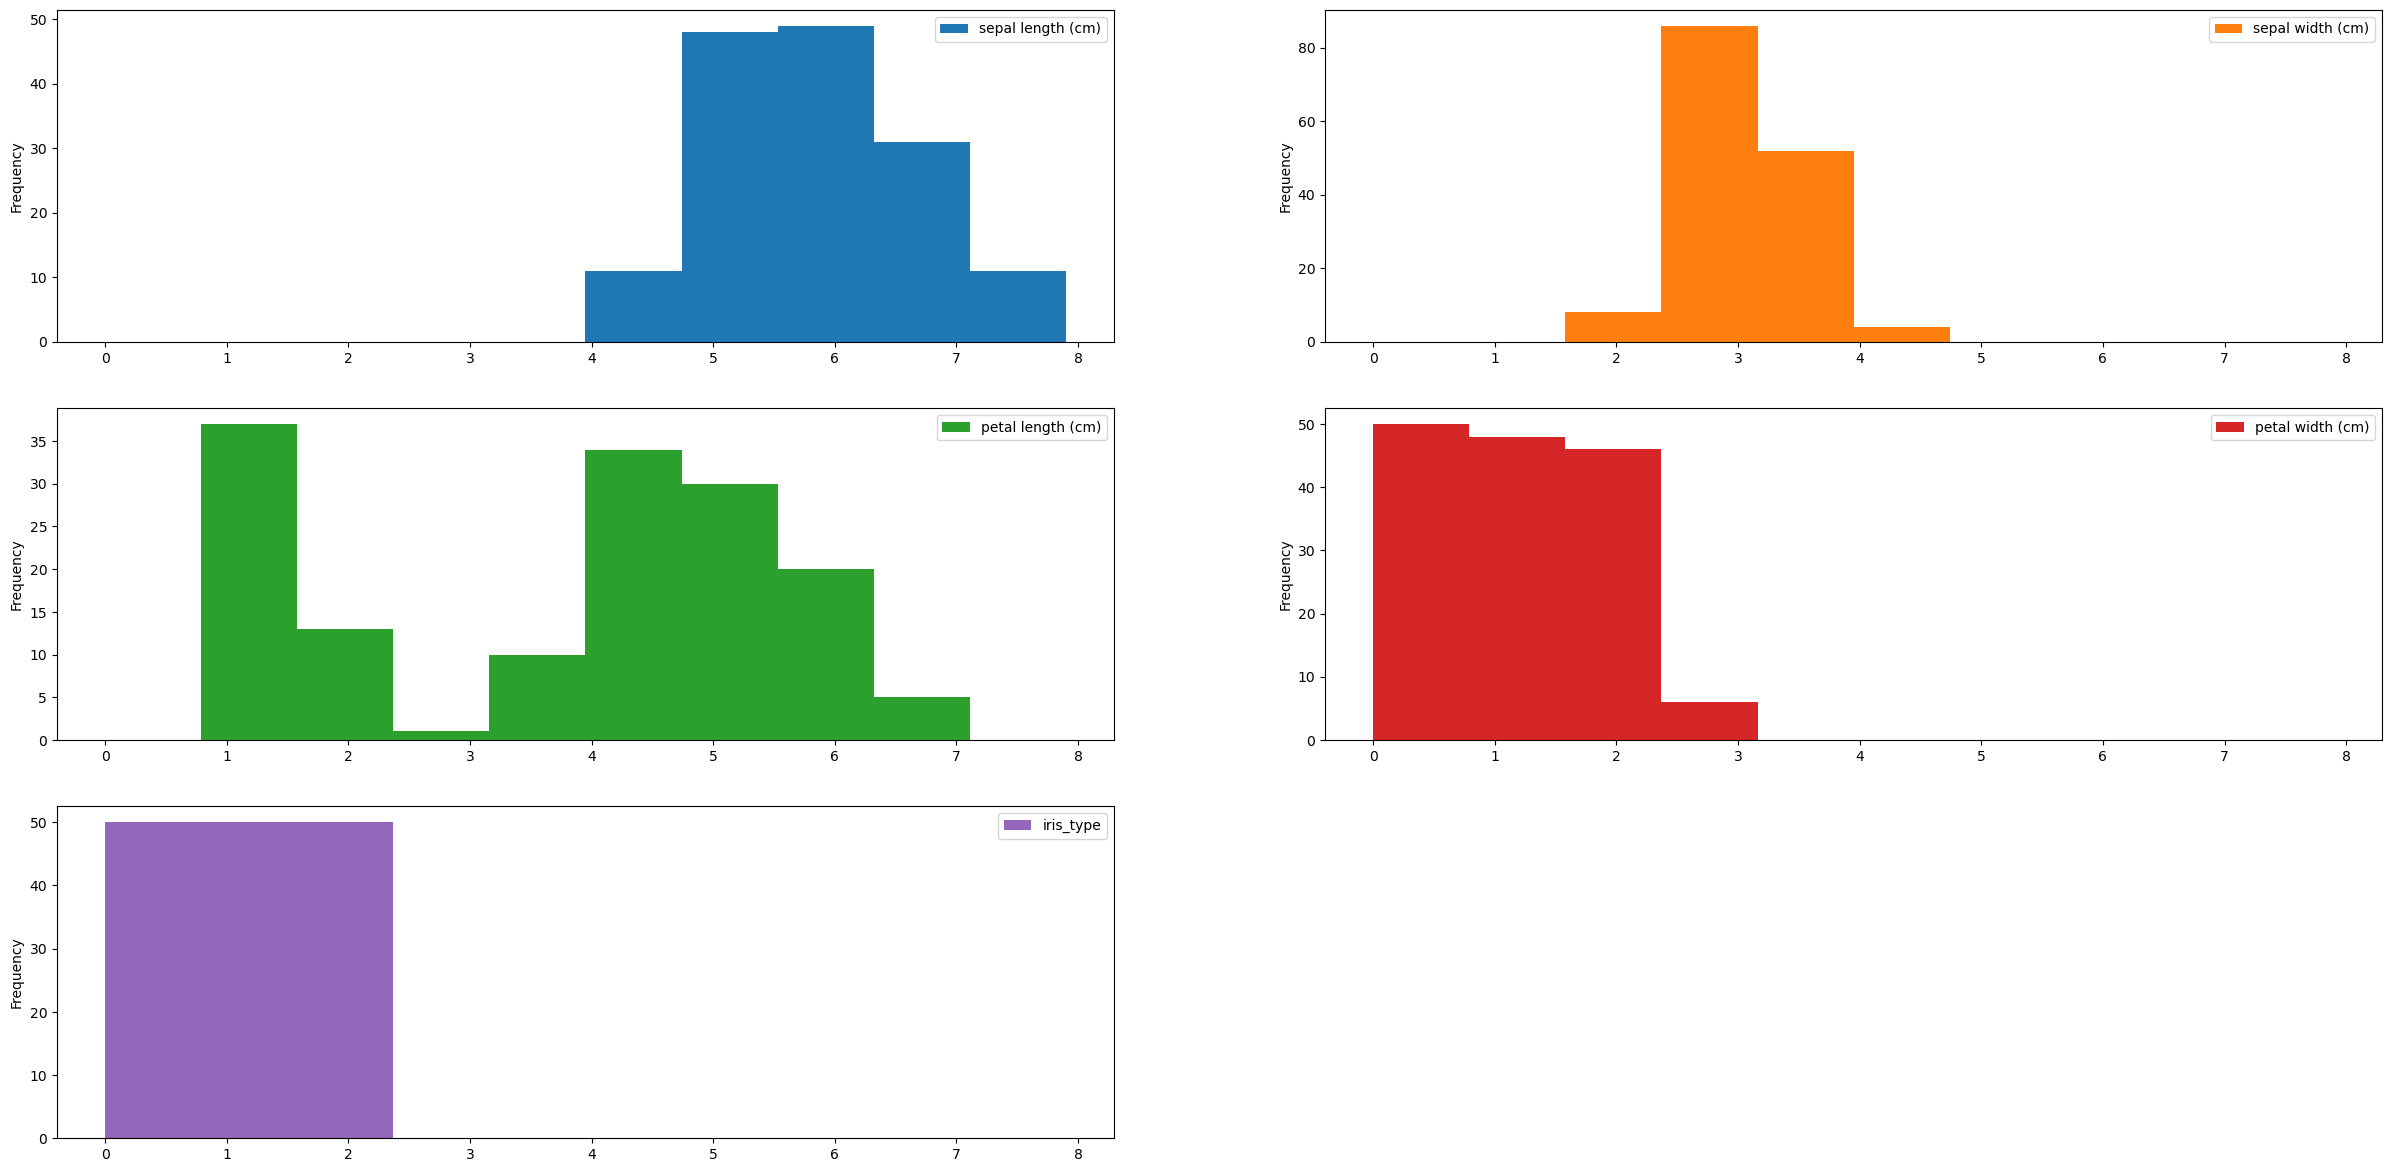

In [70]:
plt.rcParams['figure.figsize']=(30,25)

iris_df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [71]:
correlation = iris_df.corr()

In [72]:
correlation['iris_type'].sort_values(ascending=False)

iris_type            1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: iris_type, dtype: float64

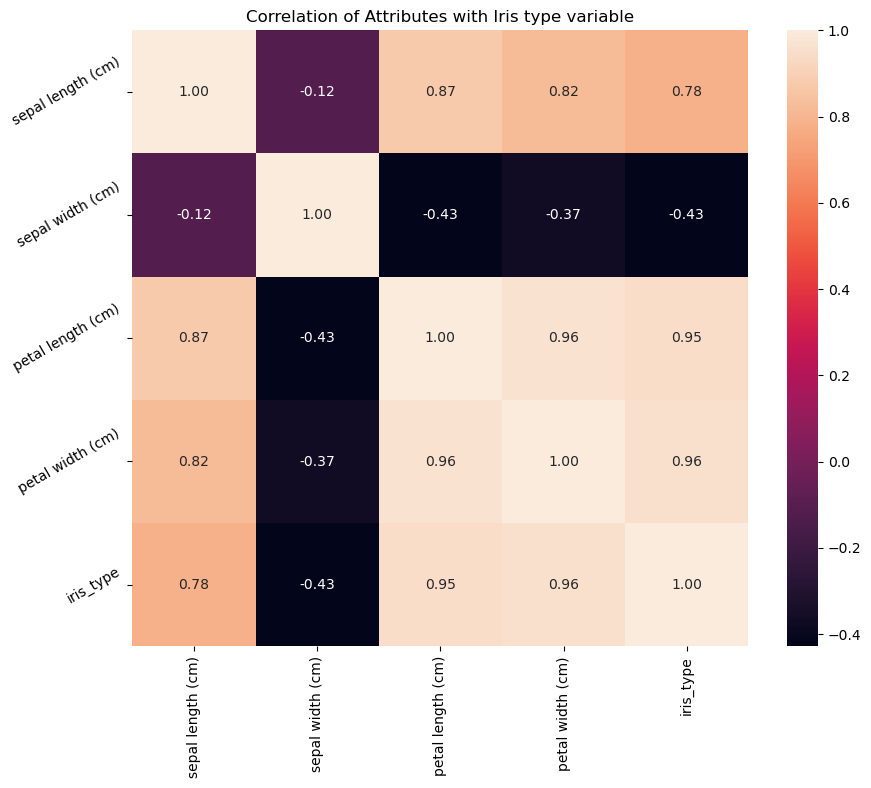

In [73]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Iris type variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [74]:
X = iris_df.drop(['iris_type'], axis=1)

y = iris_df['iris_type']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [77]:
cols = X_train.columns

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [79]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [80]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [81]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.613030,0.108501,0.947518,0.736072
1,-0.567766,-0.124001,0.384914,0.347530
2,-0.803926,1.038510,-1.302896,-1.336154
3,0.258791,-0.124001,0.609956,0.736072
4,0.613030,-0.589006,1.003778,1.254129


In [82]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.095448,-0.589006,0.722476,1.513157
1,0.140712,-1.984019,0.103613,-0.300041
2,-0.449687,2.666026,-1.359156,-1.336154
3,1.675747,-0.356503,1.397601,0.736072
4,-1.040085,0.806008,-1.302896,-1.336154


In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = knn.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9667


In [86]:
y_pred_train = knn.predict(X_train)

In [87]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9667


In [88]:
y_test.value_counts()

1    13
0    11
2     6
Name: iris_type, dtype: int64

In [89]:
null_accuracy = (13/(13+11+6))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.4333


In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
for i in range(3,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    print('Model accuracy score with k=',i,' : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
    cm = confusion_matrix(y_test, y_pred)

    print('Confusion matrix\n\n', cm)

    print('\nTrue Positives(TP) = ', cm[0,0])

    print('\nTrue Negatives(TN) = ', cm[1,1])

    print('\nFalse Positives(FP) = ', cm[0,1])

    print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score with k= 3  : 0.9667
Training-set accuracy score: 0.9667
Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0
Model accuracy score with k= 4  : 0.9667
Training-set accuracy score: 0.9667
Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0
Model accuracy score with k= 5  : 1.0000
Training-set accuracy score: 0.9583
Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0
Model accuracy score with k= 6  : 1.0000
Training-set accuracy score: 0.9583
Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0
Model accuracy score with k= 7  : 1.0000
Training-se

При значениях k 7, 8, 9, 10 accuracy на обучающих и тестовых данных имеют самые высокие значения, соответственно для обучения оптимально брать количество соседей соответствующее этим цифрам. 